In [10]:
# dict_ = {"n_neighbors": np.arange(1,200),
#         "weights" : ['uniform', 'distance'],
#         "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#         "leaf_size" : np.arange(1,10)}

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import os
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [6]:
os.getcwd()

'C:\\Users\\gmbas\\Downloads\\Files_lol_project\\datasets'

In [5]:
os.chdir('datasets')

In [7]:
os.listdir()

["'df_blue_and_red_23_06'",
 '930_matches_df_19_05.csv',
 '932_matches_23_06',
 '932_matches_com_g_truth_final',
 '932_matches_df_21_06',
 '932_matches_df_23_06',
 'BOTHPARCIAL',
 'df_blue_23_06',
 'df_cheating_positions_870_matches_28_06.csv',
 'df_correto_20features_839partidas_sem_erro',
 'df_finalll_23_06',
 'df_final_provisorio',
 'df_NOT_cheating_positions_870_matches_28_06.csv',
 'df_red_23_06',
 'finallllllcomtarget']

In [3]:
%config Completer.use_jedi = False

In [8]:
df = pd.read_csv('df_NOT_cheating_positions_870_matches_28_06.csv')
df

,CS_min_ass_top_blue,CS_min_ass_jg_blue,CS_min_ass_mid_blue,CS_min_ass_adc_blue,CS_min_ass_sup_blue,CS_min_ass_top_red,CS_min_ass_jg_red,CS_min_ass_mid_red,CS_min_ass_adc_red,CS_min_ass_sup_red,...,MP_ass_jg_blue,MP_ass_mid_blue,MP_ass_adc_blue,MP_ass_sup_blue,MP_ass_top_red,MP_ass_jg_red,MP_ass_mid_red,MP_ass_adc_red,MP_ass_sup_red,target
0,4.756204,5.939718,4.573580,6.626648,1.976583,4.747214,5.366882,6.067965,5.895539,1.162788,...,6045,27869,139033,90591,17226,60900,104796.0,5702,6894.0,1
1,6.249752,3.867070,6.870524,5.623977,5.469181,5.649067,5.125936,6.146694,3.587890,0.740881,...,12382,39489,1173761,230329,2342839,25119,39085.0,120399,81033.0,0
2,5.340403,4.598162,4.825763,5.681439,1.080000,4.498963,6.289723,5.405575,4.766707,2.085663,...,35375,18062,30808,53165,10990,1209,11605.0,17510,1377402.0,1
3,5.976233,4.984266,2.671286,5.148903,0.363769,6.529087,6.166968,5.071400,5.178816,1.734322,...,191837,193851,27186,159593,464856,47094,58443.0,87329,19550.0,0
4,5.915913,4.925813,6.164462,5.484073,1.368294,7.049121,5.477247,5.392639,6.682713,0.815051,...,101033,1233,34450,15688,11980,22250,52517.0,71398,11441.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,4.687110,5.788344,6.129966,4.503127,5.044911,6.509041,6.566786,6.393877,6.451557,1.583707,...,1784,39021,40178,1543,63574,5840,21496.0,87591,1505092.0,0
867,3.858181,4.125231,3.242855,5.436693,0.206679,4.890833,4.194576,4.323031,5.414535,3.042890,...,10650,35904,56382,495855,66034,2743,709380.0,721154,202130.0,1
868,4.858114,6.261634,5.456084,6.332916,1.513932,4.932086,5.188566,5.850610,4.896937,4.486468,...,1414,85240,100878,543559,6775,946303,12643.0,3374,2092.0,1
869,4.367879,4.490651,6.566390,5.920417,1.941900,5.424155,5.287674,3.839915,4.261205,0.475627,...,7072,37538,139703,150471,152271,8974,27138.0,9033,178701.0,0


In [9]:
df.columns

Index(['CS_min_ass_top_blue', 'CS_min_ass_jg_blue', 'CS_min_ass_mid_blue',
       'CS_min_ass_adc_blue', 'CS_min_ass_sup_blue', 'CS_min_ass_top_red',
       'CS_min_ass_jg_red', 'CS_min_ass_mid_red', 'CS_min_ass_adc_red',
       'CS_min_ass_sup_red', 'kda_ass_top_blue', 'kda_ass_jg_blue',
       'kda_ass_mid_blue', 'kda_ass_adc_blue', 'kda_ass_sup_blue',
       'kda_ass_top_red', 'kda_ass_jg_red', 'kda_ass_mid_red',
       'kda_ass_adc_red', 'kda_ass_sup_red', 'MP_ass_top_blue',
       'MP_ass_jg_blue', 'MP_ass_mid_blue', 'MP_ass_adc_blue',
       'MP_ass_sup_blue', 'MP_ass_top_red', 'MP_ass_jg_red', 'MP_ass_mid_red',
       'MP_ass_adc_red', 'MP_ass_sup_red', 'target'],
      dtype='object')

In [10]:
df.describe()

,CS_min_ass_top_blue,CS_min_ass_jg_blue,CS_min_ass_mid_blue,CS_min_ass_adc_blue,CS_min_ass_sup_blue,CS_min_ass_top_red,CS_min_ass_jg_red,CS_min_ass_mid_red,CS_min_ass_adc_red,CS_min_ass_sup_red,...,MP_ass_jg_blue,MP_ass_mid_blue,MP_ass_adc_blue,MP_ass_sup_blue,MP_ass_top_red,MP_ass_jg_red,MP_ass_mid_red,MP_ass_adc_red,MP_ass_sup_red,target
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,...,8.710000e+02,8.710000e+02,8.710000e+02,8.710000e+02,8.710000e+02,8.710000e+02,8.710000e+02,8.710000e+02,8.710000e+02,871.000000
mean,5.386641,5.125579,5.156438,5.326528,2.598806,5.366897,5.109517,5.128653,5.355599,2.599488,...,1.331543e+05,1.656747e+05,1.354595e+05,1.430494e+05,1.428014e+05,1.625012e+05,1.572676e+05,1.242150e+05,1.564856e+05,0.507463
std,1.131002,1.098799,1.172662,1.191630,1.583736,1.108250,1.089444,1.227563,1.223913,1.620430,...,2.916050e+05,3.256000e+05,2.238448e+05,2.377983e+05,3.511960e+05,4.742453e+05,2.993467e+05,2.156167e+05,2.671584e+05,0.500232
min,0.259385,0.003120,0.005037,0.114806,0.056887,0.578409,0.005014,0.706232,0.003550,0.000619,...,1.600000e+02,2.080000e+02,1.120000e+02,1.520000e+02,1.110000e+02,1.150000e+02,2.050000e+02,1.170000e+02,1.160000e+02,0.000000
25%,4.822939,4.599133,4.596509,4.786450,1.294417,4.751683,4.606458,4.504453,4.732520,1.268793,...,1.356150e+04,1.858200e+04,1.998650e+04,1.746800e+04,1.262600e+04,1.345500e+04,1.517450e+04,1.844700e+04,1.979750e+04,0.000000
50%,5.464071,5.234699,5.304732,5.489677,2.176626,5.433080,5.248793,5.330201,5.544018,2.154987,...,3.848300e+04,5.782500e+04,5.632200e+04,5.824700e+04,3.890200e+04,4.060500e+04,4.976900e+04,5.491200e+04,5.708800e+04,1.000000
75%,6.105439,5.794117,5.915006,6.091402,3.741993,6.153083,5.791490,5.903002,6.164746,3.831849,...,1.286865e+05,1.705210e+05,1.458895e+05,1.677065e+05,1.191315e+05,1.235390e+05,1.598940e+05,1.363410e+05,1.814335e+05,1.000000
max,8.256664,8.265241,8.414453,8.655552,7.107505,8.437891,7.985336,8.053961,8.341881,7.214272,...,3.460805e+06,3.263209e+06,2.974271e+06,2.234451e+06,6.850851e+06,8.835268e+06,3.916739e+06,2.974271e+06,2.928283e+06,1.000000


In [11]:
df.shape

(871, 31)

In [12]:
df.dropna().shape


(871, 31)

In [13]:
y = df['target']
X = df.drop('target',axis = 1)
#df[0:160], df[161:]

In [14]:
X.shape

(871, 30)

In [15]:
y.shape

(871,)

In [26]:
# cutoff1 = round(X.shape[0]*0.6)
# cutoff2 = round(X.shape[0]*0.8)
# X_train,X_val,X_test = X[0:cutoff1], X[cutoff1:cutoff2],X[cutoff2:]
# y_train,y_val,y_test = y[0:cutoff1],y[cutoff1:cutoff2], y[cutoff2:]

In [16]:
cutoff1 = round(X.shape[0]*0.6)
cutoff2 = round(X.shape[0]*0.8)
X,X_test = X[0:cutoff2],X[cutoff2:]
y,y_test = y[0:cutoff2],y[cutoff2:]

In [20]:
#Check if dimensions are correct
y

0      1
1      0
2      1
3      0
4      1
      ..
692    1
693    0
694    1
695    1
696    1
Name: target, Length: 697, dtype: int64

In [29]:
#s_scaler = StandardScaler()

In [ ]:
#s_scaler.fit(X_train)

In [ ]:
#X_val.describe()

In [ ]:
# X_train = s_scaler.transform(X_train)
# X_val = s_scaler.transform(X_val)
# X_test = s_scaler.transform(X_test)

In [21]:
log_reg = LogisticRegression()

In [22]:
log_reg.fit(X,y)

LogisticRegression()

In [23]:
#train score
log_reg.score(X,y)

0.5681492109038737

In [24]:
#test score
log_reg.score(X_test,y_test)

0.46551724137931033

In [25]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [26]:
y_test.shape

(174,)

In [27]:
y_pred_prob.shape

(174,)

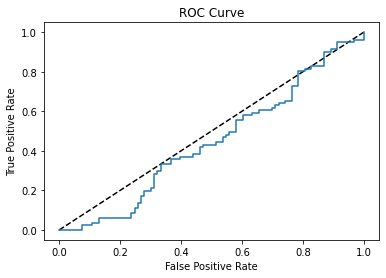

In [28]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [29]:
auc = roc_auc_score(y_test,y_pred_prob)
auc

0.44431169520775254

**KNN**

In [30]:
knn = KNeighborsClassifier()

In [31]:
knn.fit(X,y)

KNeighborsClassifier()

In [32]:
knn.score(X,y)

0.6456241032998565

In [33]:
knn.score(X_test,y_test)

0.47126436781609193

In [34]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

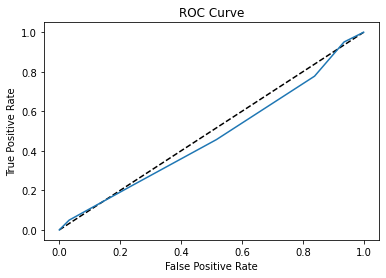

In [35]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [36]:
auc = roc_auc_score(y_test,y_pred_prob)
auc

0.4691358024691358

In [39]:
y_pred = knn.predict(X_test)

In [40]:
cmatrix = confusion_matrix(y_test,y_pred)
cmatrix

array([[45, 48],
       [44, 37]], dtype=int64)

<AxesSubplot:title={'center':'Matriz de confusão'}>

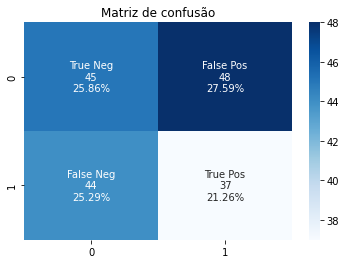

In [41]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cmatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmatrix.flatten()/np.sum(cmatrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Matriz de confusão')
sns.heatmap(cmatrix, annot=labels, fmt='', cmap='Blues')

**Random Forest**

In [42]:
RF = RandomForestClassifier()

In [43]:
RF.fit(X,y)

RandomForestClassifier()

In [44]:
RF.score(X,y)

1.0

In [45]:
RF.score(X_test,y_test)

0.5402298850574713

In [46]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = RF.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

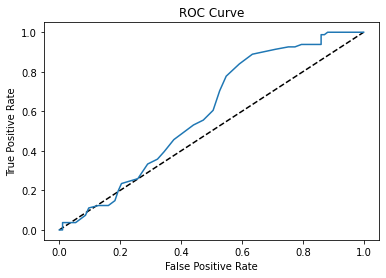

In [47]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [48]:
roc_auc_score(y_test,y_pred_prob)

0.5925925925925926

# **Optimizing Hyperparameters**

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [51]:
from sklearn.model_selection import TimeSeriesSplit

In [52]:
tscv = TimeSeriesSplit()

In [53]:
tscv.split(X)

<generator object TimeSeriesSplit.split at 0x0000029745CB3990>

In [54]:
for train_index, val_index in tscv.split(X):
    print(f"train = {train_index},val_index = {val_index}")

train = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116],val_index = [117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232]
train = [  0   1   2   3   4   5

In [ ]:
# versão modificada leave one out CV
# n_samples = 10

# Train      Test

# 1           10
# 2
# 3
# 4
# 5
# 6
# 7
# 8
# 9



# Train      Test

# 1           9
# 2
# 3
# 4
# 5
# 6
# 7
# 8


# Train      Test

# 1           8
# 2
# 3
# 4
# 5
# 6
# 7



In [56]:
def range_splitter(n_samples,iterations):
    both_indexes = []
    for i in range(iterations):
        test_index = n_samples -  i - 1
        train_index_list = np.arange(0,test_index)
        test_index_list = np.array([test_index])
        both_indexes.append([train_index_list,test_index_list])
    return both_indexes

In [ ]:
RandomForestClassifier()

In [55]:
train_scores = []
val_scores = []
hyper_params = []
#n_estimators,max_features
#for max_depth_ in np.arange(1,20):#for max_depth_ in np.arange(1,100):
for n_estimators_ in [500]:      #np.arange(10,110,10):
    for max_features_ in (None,"sqrt"):
        for min_samples_leaf in np.arange(20,100,10):
            train_ = []
            val_ = []
            for train_index, val_index in tscv.split(X):
                #X = pd.DataFrame(X.iloc[train_index,:])
                #print("TRAIN:", train_index, "TEST:", test_index)
                rf = RandomForestClassifier(n_estimators=n_estimators_, 
                                            max_depth=max_depth_, 
                                            max_features=max_features_,
                                            random_state=42)
                #print(train_index,np.shape)
                X_train2, X_val2 = X.iloc[train_index,:], X.iloc[val_index,:]
                y_train2, y_val2 = y.iloc[train_index], y.iloc[val_index]
                rf.fit(X_train2,y_train2)
            #     y_train_pred = rf.predict(X_train2)
            #     y_val_pred = rf.predict(X_val2)
                train_.append(rf.score(X_train2,y_train2))
                val_.append(rf.score(X_val2,y_val2))

            train_scores.append(train_)    
            val_scores.append(val_)
            hyper_params.append((max_depth_,n_estimators_,max_features_))
            print(f"train mean = {np.mean(np.array(train_))},val mean = {np.mean(np.array(val_))}")




train mean = 0.617434084932634,val mean = 0.5137931034482758
train mean = 0.6158065884239938,val mean = 0.5103448275862068
train mean = 0.625835948232028,val mean = 0.506896551724138
train mean = 0.6338487512007712,val mean = 0.5155172413793103
train mean = 0.6270249700206015,val mean = 0.5086206896551724
train mean = 0.6233248260297711,val mean = 0.4931034482758621
train mean = 0.6330407863372108,val mean = 0.5189655172413793
train mean = 0.6442384417769201,val mean = 0.5172413793103449
train mean = 0.6414565964042842,val mean = 0.5206896551724138
train mean = 0.6425388501458282,val mean = 0.5120689655172413
train mean = 0.6444305964494786,val mean = 0.5137931034482759
train mean = 0.6526582705909866,val mean = 0.5120689655172413
train mean = 0.6593313230402778,val mean = 0.5189655172413793
train mean = 0.6557388172857671,val mean = 0.5086206896551724
train mean = 0.6568242817380742,val mean = 0.5310344827586208
train mean = 0.6618824425613733,val mean = 0.506896551724138
train mean =

train mean = 0.996730886680362,val mean = 0.539655172413793
train mean = 0.9915693481808873,val mean = 0.5327586206896552
train mean = 0.9963007791534804,val mean = 0.5465517241379311
train mean = 0.9925725216103478,val mean = 0.5310344827586206
train mean = 0.997075120759536,val mean = 0.5327586206896552
train mean = 0.9927737973138246,val mean = 0.5448275862068965
train mean = 0.9704568829883675,val mean = 0.5275862068965517
train mean = 0.9653972920884305,val mean = 0.5396551724137931
train mean = 0.9921739155796597,val mean = 0.5224137931034483
train mean = 0.987644373865804,val mean = 0.5379310344827586
train mean = 0.9972193115350235,val mean = 0.5155172413793103
train mean = 0.9950385048042115,val mean = 0.5586206896551724
train mean = 0.9970180358315466,val mean = 0.5224137931034483
train mean = 0.9969314220954966,val mean = 0.5620689655172415
train mean = 0.9979353358132993,val mean = 0.5517241379310345
train mean = 0.997934595524957,val mean = 0.5758620689655171
train mean = 

train mean = 1.0,val mean = 0.5275862068965518
train mean = 1.0,val mean = 0.543103448275862
train mean = 1.0,val mean = 0.539655172413793
train mean = 1.0,val mean = 0.546551724137931
train mean = 1.0,val mean = 0.543103448275862
train mean = 1.0,val mean = 0.5586206896551724
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5568965517241379
train mean = 1.0,val mean = 0.5275862068965518
train mean = 1.0,val mean = 0.5482758620689655
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5586206896551724
train mean = 1.0,val mean = 0.5431034482758621
train mean = 0.9771162979254594,val mean = 0.506896551724138
train mean = 0.9858062419774842,val mean = 0.5241379310344827
train mean = 0.9989968265705395,val mean = 0.503448275862069
train mean = 0.9987973968221138,val mean = 0.5362068965517242
train mean = 1.0,val mean = 0.5172413793103449
train mean = 1.0,val mean = 0.5275862068965516
train mean = 1.0,val mean = 0.5086206896551724
train 

train mean = 1.0,val mean = 0.5448275862068965
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5172413793103448
train mean = 1.0,val mean = 0.5482758620689655
train mean = 1.0,val mean = 0.5344827586206896
train mean = 1.0,val mean = 0.5603448275862069
train mean = 1.0,val mean = 0.5224137931034483
train mean = 0.9776893638280383,val mean = 0.506896551724138
train mean = 0.9861486301016071,val mean = 0.5224137931034483
train mean = 0.9989968265705395,val mean = 0.5086206896551724
train mean = 0.9987115233744058,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.5172413793103449
train mean = 1.0,val mean = 0.5327586206896552
train mean = 1.0,val mean = 0.5120689655172413
train mean = 1.0,val mean = 0.5379310344827587
train mean = 1.0,val mean = 0.5482758620689655
train mean = 1.0,val mean = 0.543103448275862
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5517241379310345
train mean = 1.0,val mean = 0.560344827586207
trai

train mean = 0.9861486301016071,val mean = 0.5224137931034483
train mean = 0.9989968265705395,val mean = 0.5086206896551724
train mean = 0.9987115233744058,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5172413793103449
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5155172413793103
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5551724137931034
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5206896551724137
train mean = 1.0,val mean = 0.5482758620689655
train mean = 1.0,val mean = 0.5327586206896551
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5258620689655172
train mean = 0.9776893638280383,val mean = 0.506896551724138
train mean = 0.986148630101607

train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5551724137931034
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5206896551724137
train mean = 1.0,val mean = 0.5482758620689655
train mean = 1.0,val mean = 0.5327586206896551
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5258620689655172
train mean = 0.9776893638280383,val mean = 0.506896551724138
train mean = 0.9861486301016071,val mean = 0.5224137931034483
train mean = 0.9989968265705395,val mean = 0.5086206896551724
train mean = 0.9987115233744058,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5172413793103449
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5155172413793103
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.

train mean = 0.9776893638280383,val mean = 0.506896551724138
train mean = 0.9861486301016071,val mean = 0.5224137931034483
train mean = 0.9989968265705395,val mean = 0.5086206896551724
train mean = 0.9987115233744058,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5172413793103449
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5155172413793103
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5551724137931034
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5206896551724137
train mean = 1.0,val mean = 0.5482758620689655
train mean = 1.0,val mean = 0.5327586206896551
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5258620689655172
train mean = 0.977689363828038

train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5551724137931034
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5206896551724137
train mean = 1.0,val mean = 0.5482758620689655
train mean = 1.0,val mean = 0.5327586206896551
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5258620689655172
train mean = 0.9776893638280383,val mean = 0.506896551724138
train mean = 0.9861486301016071,val mean = 0.5224137931034483
train mean = 0.9989968265705395,val mean = 0.5086206896551724
train mean = 0.9987115233744058,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5172413793103449
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5155172413793103
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.

train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5258620689655172
train mean = 0.9776893638280383,val mean = 0.506896551724138
train mean = 0.9861486301016071,val mean = 0.5224137931034483
train mean = 0.9989968265705395,val mean = 0.5086206896551724
train mean = 0.9987115233744058,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5172413793103449
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5155172413793103
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5551724137931034
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5206896551724137
train mean = 1.0,val mean = 0.5482758620689655
train mean = 1.0,val mean = 0.5327586206896551
train mean = 1.0,val mean = 0.

train mean = 1.0,val mean = 0.5155172413793103
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5551724137931034
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5206896551724137
train mean = 1.0,val mean = 0.5482758620689655
train mean = 1.0,val mean = 0.5327586206896551
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5258620689655172
train mean = 0.9776893638280383,val mean = 0.506896551724138
train mean = 0.9861486301016071,val mean = 0.5224137931034483
train mean = 0.9989968265705395,val mean = 0.5086206896551724
train mean = 0.9987115233744058,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5172413793103449
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.

train mean = 1.0,val mean = 0.5482758620689655
train mean = 1.0,val mean = 0.5327586206896551
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5258620689655172
train mean = 0.9776893638280383,val mean = 0.506896551724138
train mean = 0.9861486301016071,val mean = 0.5224137931034483
train mean = 0.9989968265705395,val mean = 0.5086206896551724
train mean = 0.9987115233744058,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5172413793103449
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5155172413793103
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5551724137931034
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5206896551724137
train mean = 1.0,val mean = 0.

train mean = 1.0,val mean = 0.5172413793103449
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5155172413793103
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.55
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5551724137931034
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5206896551724137
train mean = 1.0,val mean = 0.5482758620689655
train mean = 1.0,val mean = 0.5327586206896551
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5258620689655172
train mean = 0.9776893638280383,val mean = 0.506896551724138
train mean = 0.9861486301016071,val mean = 0.5224137931034483
train mean = 0.9989968265705395,val mean = 0.5086206896551724
train mean = 0.9987115233744058,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.

train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5206896551724137
train mean = 1.0,val mean = 0.5482758620689655
train mean = 1.0,val mean = 0.5327586206896551
train mean = 1.0,val mean = 0.5620689655172414
train mean = 1.0,val mean = 0.5258620689655172


In [57]:
mean_arr_val = []
for arr in val_scores:
    mean_arr_val.append(np.mean(arr))
print(max(mean_arr_val))

0.5758620689655171


In [59]:
arr2 = np.array(mean_arr_val)
arr2[mean_arr_val == 0.5758620689655171]

array([], shape=(0, 1980), dtype=float64)

In [ ]:
arr2[arr2 > 0.58]

In [60]:
np.where(arr2 == 0.5758620689655171)

(array([149], dtype=int64),)

In [61]:
hyper_params[149]

(8, 50, 'sqrt')

In [62]:
RF2 = RandomForestClassifier(n_estimators=50,
                             max_depth = 8,
                             max_features = 'sqrt')

In [63]:
RF2.fit(X,y)

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=50)

In [64]:
#train_score
RF2.score(X,y)

0.9827833572453372

In [65]:
#test_score
RF2.score(X_test,y_test)

0.5402298850574713

In [66]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# rf.fit(X_train,y_train)
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = RF, 
#                                param_distributions = random_grid, 
#                                n_iter = 100, 
#                                cv = , 
#                                verbose=2, 
#                                random_state=42, 
#                                n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [67]:
# train_scores = []
# val_scores = []

# for train_index, val_index in tscv.split(X):
#     #print("TRAIN:", train_index, "TEST:", test_index)
#     #print(type(train_index))
#     rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features='auto',random_state=42)
#     train_index_list = list(train_index)
#     val_index_list = list(val_index)
#     X_train2, X_val2 = X[train_index_list[0]:train_index_list[-1]], X[val_index_list[0]:val_index_list[-1]]
#     y_train2, y_val2 = y[train_index_list[0]:train_index_list[-1]], y[val_index_list[0]:val_index_list[-1]]
#     rf.fit(X_train2,y_train2)
# #     y_train_pred = rf.predict(X_train2)
# #     y_val_pred = rf.predict(X_val2)
#     train_scores.append(rf.score(X_train2,y_train2))
#     val_scores.append(rf.score(X_val2,y_val2))

# print(f"train mean = {np.mean(np.array(train_scores))},test mean = {np.mean(np.array(val_scores))}")



# Lightgbm

In [69]:
!pip install lightgbm

  Using cached lightgbm-3.3.2-py3-none-win_amd64.whl (1.0 MB)



You should consider upgrading via the 'C:\Users\gmbas\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [70]:
from lightgbm import LGBMClassifier

In [71]:
lightgbm = LGBMClassifier()

In [72]:
lightgbm.fit(X,y)

LGBMClassifier()

In [73]:
lightgbm.score(X_test,y_test)

0.5574712643678161

In [74]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lightgbm.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

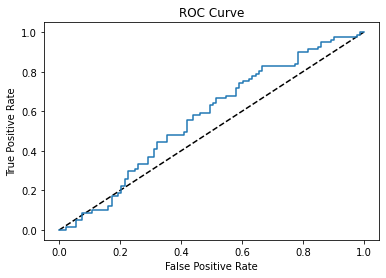

In [75]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [76]:
roc_auc_score(y_test,y_pred_prob)

0.5685649807513606

In [77]:
from sklearn import preprocessing

In [78]:
X_train = X
Y_train = y

In [79]:
lbl = preprocessing.LabelEncoder()
for col in X_train.columns:
  X_train[col] = lbl.fit_transform(X_train[col].astype(str))
  X_test[col] = lbl.fit_transform(X_test[col].astype(str))

In [80]:
import lightgbm as lgb
hyperparameters = {'boosting_type':'gbdt', 'num_leaves':2, 'max_depth':7, 'learning_rate':0.5, 'n_estimators':100, 'subsample_for_bin':50,'reg_lambda': 10}
booster = lgb.LGBMClassifier(**hyperparameters)
clf = booster.fit(X_train,Y_train,feature_name = list(X_train.columns) )
y_pred_train = clf.predict_proba(X_train).T[1]
y_pred_test = clf.predict_proba(X_test).T[1]




In [81]:
clf.score(X_train,Y_train)

0.7230989956958394

In [82]:
clf.score(X_test,y_test)

0.4885057471264368

In [78]:
!pip install catboost

^C


In [83]:
cutoff1 = round(X.shape[0]*0.6)
cutoff2 = round(X.shape[0]*0.8)
X_train,X_val,X_test = X[0:cutoff1], X[cutoff1:cutoff2],X[cutoff2:]
y_train,y_val,y_test = y[0:cutoff1],y[cutoff1:cutoff2], y[cutoff2:]

In [86]:
from catboost import CatBoostClassifier, CatBoostRegressor

model = CatBoostClassifier(num_trees=1000,
                           eval_metric='Logloss', 
                           thread_count=-1,
                           random_seed=42)
          
model.fit(X_train, y_train,
          verbose=True,
          early_stopping_rounds=50,
          eval_set=[(X_val, y_val)])

Learning rate set to 0.025547
0:	learn: 0.6897710	test: 0.6927078	best: 0.6927078 (0)	total: 5.18s	remaining: 1h 26m 10s
1:	learn: 0.6846180	test: 0.6913051	best: 0.6913051 (1)	total: 5.21s	remaining: 43m 22s
2:	learn: 0.6813343	test: 0.6909794	best: 0.6909794 (2)	total: 5.23s	remaining: 28m 57s
3:	learn: 0.6769157	test: 0.6914538	best: 0.6909794 (2)	total: 5.33s	remaining: 22m 6s
4:	learn: 0.6729241	test: 0.6909219	best: 0.6909219 (4)	total: 5.35s	remaining: 17m 43s
5:	learn: 0.6713957	test: 0.6895951	best: 0.6895951 (5)	total: 5.36s	remaining: 14m 48s
6:	learn: 0.6676630	test: 0.6901610	best: 0.6895951 (5)	total: 5.37s	remaining: 12m 41s
7:	learn: 0.6638269	test: 0.6897719	best: 0.6895951 (5)	total: 5.4s	remaining: 11m 9s
8:	learn: 0.6594992	test: 0.6912691	best: 0.6895951 (5)	total: 5.41s	remaining: 9m 55s
9:	learn: 0.6558742	test: 0.6925636	best: 0.6895951 (5)	total: 5.42s	remaining: 8m 56s
10:	learn: 0.6527879	test: 0.6937931	best: 0.6895951 (5)	total: 5.43s	remaining: 8m 8s
11:	l

In [87]:
np.mean(model.predict(X_test)==y_test)

0.43884892086330934

In [88]:
model.score(X_test,y_test)

0.43884892086330934

In [89]:
df.columns

Index(['CS_min_ass_top_blue', 'CS_min_ass_jg_blue', 'CS_min_ass_mid_blue',
       'CS_min_ass_adc_blue', 'CS_min_ass_sup_blue', 'CS_min_ass_top_red',
       'CS_min_ass_jg_red', 'CS_min_ass_mid_red', 'CS_min_ass_adc_red',
       'CS_min_ass_sup_red', 'kda_ass_top_blue', 'kda_ass_jg_blue',
       'kda_ass_mid_blue', 'kda_ass_adc_blue', 'kda_ass_sup_blue',
       'kda_ass_top_red', 'kda_ass_jg_red', 'kda_ass_mid_red',
       'kda_ass_adc_red', 'kda_ass_sup_red', 'MP_ass_top_blue',
       'MP_ass_jg_blue', 'MP_ass_mid_blue', 'MP_ass_adc_blue',
       'MP_ass_sup_blue', 'MP_ass_top_red', 'MP_ass_jg_red', 'MP_ass_mid_red',
       'MP_ass_adc_red', 'MP_ass_sup_red', 'target'],
      dtype='object')

In [90]:
df2 = df.drop(['CS_min_ass_top_blue', 'CS_min_ass_jg_blue', 'CS_min_ass_mid_blue',
       'CS_min_ass_adc_blue', 'CS_min_ass_sup_blue', 'CS_min_ass_top_red',
       'CS_min_ass_jg_red', 'CS_min_ass_mid_red', 'CS_min_ass_adc_red',
       'CS_min_ass_sup_red', 'kda_ass_top_blue', 'kda_ass_jg_blue',
       'kda_ass_mid_blue', 'kda_ass_adc_blue', 'kda_ass_sup_blue',
       'kda_ass_top_red', 'kda_ass_jg_red', 'kda_ass_mid_red',
       'kda_ass_adc_red', 'kda_ass_sup_red'],axis = 1)

In [91]:
df2

,MP_ass_top_blue,MP_ass_jg_blue,MP_ass_mid_blue,MP_ass_adc_blue,MP_ass_sup_blue,MP_ass_top_red,MP_ass_jg_red,MP_ass_mid_red,MP_ass_adc_red,MP_ass_sup_red,target
0,28759,6045,27869,139033,90591,17226,60900,104796.0,5702,6894.0,1
1,1140402,12382,39489,1173761,230329,2342839,25119,39085.0,120399,81033.0,0
2,11852,35375,18062,30808,53165,10990,1209,11605.0,17510,1377402.0,1
3,292959,191837,193851,27186,159593,464856,47094,58443.0,87329,19550.0,0
4,10714,101033,1233,34450,15688,11980,22250,52517.0,71398,11441.0,1
...,...,...,...,...,...,...,...,...,...,...,...
866,79802,1784,39021,40178,1543,63574,5840,21496.0,87591,1505092.0,0
867,8771,10650,35904,56382,495855,66034,2743,709380.0,721154,202130.0,1
868,18754,1414,85240,100878,543559,6775,946303,12643.0,3374,2092.0,1
869,10958,7072,37538,139703,150471,152271,8974,27138.0,9033,178701.0,0


In [92]:
y2 = df2['target']
X2 = df2.drop('target',axis = 1)

In [93]:
X2

,MP_ass_top_blue,MP_ass_jg_blue,MP_ass_mid_blue,MP_ass_adc_blue,MP_ass_sup_blue,MP_ass_top_red,MP_ass_jg_red,MP_ass_mid_red,MP_ass_adc_red,MP_ass_sup_red
0,28759,6045,27869,139033,90591,17226,60900,104796.0,5702,6894.0
1,1140402,12382,39489,1173761,230329,2342839,25119,39085.0,120399,81033.0
2,11852,35375,18062,30808,53165,10990,1209,11605.0,17510,1377402.0
3,292959,191837,193851,27186,159593,464856,47094,58443.0,87329,19550.0
4,10714,101033,1233,34450,15688,11980,22250,52517.0,71398,11441.0
...,...,...,...,...,...,...,...,...,...,...
866,79802,1784,39021,40178,1543,63574,5840,21496.0,87591,1505092.0
867,8771,10650,35904,56382,495855,66034,2743,709380.0,721154,202130.0
868,18754,1414,85240,100878,543559,6775,946303,12643.0,3374,2092.0
869,10958,7072,37538,139703,150471,152271,8974,27138.0,9033,178701.0


In [94]:
cutoff2 = round(X.shape[0]*0.8)
X2,X_test2 = X2[0:cutoff2],X2[cutoff2:]
y2,y_test2 = y2[0:cutoff2],y2[cutoff2:]

In [95]:
RF2 = RandomForestClassifier()

In [96]:
RF2.fit(X2,y2)

RandomForestClassifier()

In [97]:
RF2.score(X_test2,y_test2)

0.5527156549520766

In [98]:
X2

,MP_ass_top_blue,MP_ass_jg_blue,MP_ass_mid_blue,MP_ass_adc_blue,MP_ass_sup_blue,MP_ass_top_red,MP_ass_jg_red,MP_ass_mid_red,MP_ass_adc_red,MP_ass_sup_red
0,28759,6045,27869,139033,90591,17226,60900,104796.0,5702,6894.0
1,1140402,12382,39489,1173761,230329,2342839,25119,39085.0,120399,81033.0
2,11852,35375,18062,30808,53165,10990,1209,11605.0,17510,1377402.0
3,292959,191837,193851,27186,159593,464856,47094,58443.0,87329,19550.0
4,10714,101033,1233,34450,15688,11980,22250,52517.0,71398,11441.0
...,...,...,...,...,...,...,...,...,...,...
553,27539,3694,1310,332304,10757,202648,52913,6610.0,80454,90816.0
554,13065,92065,36902,309430,3032,407260,81969,10695.0,29324,260516.0
555,56691,62642,391883,103404,62857,163046,1815298,21081.0,207345,1433.0
556,73052,12721,258892,4656,195969,5441,426528,23463.0,69431,35785.0


## Comparando os 2 DFs

In [100]:
os.listdir()

["'df_blue_and_red_23_06'",
 '930_matches_df_19_05.csv',
 '932_matches_23_06',
 '932_matches_com_g_truth_final',
 '932_matches_df_21_06',
 '932_matches_df_23_06',
 'BOTHPARCIAL',
 'catboost_info',
 'df_blue_23_06',
 'df_cheating_positions_870_matches_28_06.csv',
 'df_correto_20features_839partidas_sem_erro',
 'df_finalll_23_06',
 'df_final_provisorio',
 'df_NOT_cheating_positions_870_matches_28_06.csv',
 'df_red_23_06',
 'finallllllcomtarget']

In [115]:
dfkk = pd.read_csv('932_matches_23_06')
dfkk

,Unnamed: 0,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
0,0,4.756204,5.939718,4.573580,6.626648,1.976583,4.747214,5.366882,6.067965,5.895539,...,6045,27869,139033,90591,17226,60900,104796.0,5702,6894.0,1
1,1,6.249752,3.867070,6.870524,5.623977,5.469181,5.649067,5.125936,6.146694,3.587890,...,12382,39489,1173761,230329,2342839,25119,39085.0,120399,81033.0,0
2,2,5.340403,4.598162,4.825763,5.681439,1.080000,4.498963,6.289723,5.405575,4.766707,...,35375,18062,30808,53165,10990,1209,11605.0,17510,1377402.0,1
3,3,5.976233,4.984266,2.671286,5.148903,0.363769,6.529087,6.166968,5.071400,5.178816,...,191837,193851,27186,159593,464856,47094,58443.0,87329,19550.0,0
4,4,5.915913,4.925813,6.164462,5.484073,1.368294,7.049121,5.477247,5.392639,6.682713,...,101033,1233,34450,15688,11980,22250,52517.0,71398,11441.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,927,3.858181,4.125231,3.242855,5.436693,0.206679,4.890833,4.194576,4.323031,5.414535,...,10650,35904,56382,495855,66034,2743,709380.0,721154,202130.0,1
928,928,4.858114,6.261634,5.456084,6.332916,1.513932,4.932086,5.188566,5.850610,4.896937,...,1414,85240,100878,543559,6775,946303,12643.0,3374,2092.0,1
929,929,4.367879,4.490651,6.566390,5.920417,1.941900,5.424155,5.287674,3.839915,4.261205,...,7072,37538,139703,150471,152271,8974,27138.0,9033,178701.0,0
930,930,6.171789,5.208572,6.474445,2.560060,1.697442,6.960445,6.331045,6.072157,5.618855,...,3571,48540,11851,3029,38679,352602,394108.0,65706,825205.0,1


In [116]:
dfkk.columns

Index(['Unnamed: 0', '5th_CS_min_blue', '4th_CS_min_blue', '3rd_CS_min_blue',
       '2nd_CS_min_blue', '1st_CS_min_blue', '5th_CS_min_red',
       '4th_CS_min_red', '3rd_CS_min_red', '2nd_CS_min_red', '1st_CS_min_red',
       '5th_kda_blue', '4th_kda_blue', '3rd_kda_blue', '2nd_kda_blue',
       '1st_kda_blue', '5th_kda_red', '4th_kda_red', '3rd_kda_red',
       '2nd_kda_red', '1st_kda_red', '5th_MP_blue', '4th_MP_blue',
       '3rd_MP_blue', '2nd_MP_blue', '1st_MP_blue', '5th_MP_red', '4th_MP_red',
       '3rd_MP_red', '2nd_MP_red', '1st_MP_red', 'target'],
      dtype='object')

In [117]:
dfkk = dfkk.drop('Unnamed: 0',axis = 1)
dfkk

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
0,4.756204,5.939718,4.573580,6.626648,1.976583,4.747214,5.366882,6.067965,5.895539,1.162788,...,6045,27869,139033,90591,17226,60900,104796.0,5702,6894.0,1
1,6.249752,3.867070,6.870524,5.623977,5.469181,5.649067,5.125936,6.146694,3.587890,0.740881,...,12382,39489,1173761,230329,2342839,25119,39085.0,120399,81033.0,0
2,5.340403,4.598162,4.825763,5.681439,1.080000,4.498963,6.289723,5.405575,4.766707,2.085663,...,35375,18062,30808,53165,10990,1209,11605.0,17510,1377402.0,1
3,5.976233,4.984266,2.671286,5.148903,0.363769,6.529087,6.166968,5.071400,5.178816,1.734322,...,191837,193851,27186,159593,464856,47094,58443.0,87329,19550.0,0
4,5.915913,4.925813,6.164462,5.484073,1.368294,7.049121,5.477247,5.392639,6.682713,0.815051,...,101033,1233,34450,15688,11980,22250,52517.0,71398,11441.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,3.858181,4.125231,3.242855,5.436693,0.206679,4.890833,4.194576,4.323031,5.414535,3.042890,...,10650,35904,56382,495855,66034,2743,709380.0,721154,202130.0,1
928,4.858114,6.261634,5.456084,6.332916,1.513932,4.932086,5.188566,5.850610,4.896937,4.486468,...,1414,85240,100878,543559,6775,946303,12643.0,3374,2092.0,1
929,4.367879,4.490651,6.566390,5.920417,1.941900,5.424155,5.287674,3.839915,4.261205,0.475627,...,7072,37538,139703,150471,152271,8974,27138.0,9033,178701.0,0
930,6.171789,5.208572,6.474445,2.560060,1.697442,6.960445,6.331045,6.072157,5.618855,1.276204,...,3571,48540,11851,3029,38679,352602,394108.0,65706,825205.0,1


In [130]:
dfkk2 = pd.read_csv('932_matches_com_g_truth_final')


In [131]:
dfkk2

,CS_min_ass_top_blue,CS_min_ass_jg_blue,CS_min_ass_mid_blue,CS_min_ass_adc_blue,CS_min_ass_sup_blue,CS_min_ass_top_red,CS_min_ass_jg_red,CS_min_ass_mid_red,CS_min_ass_adc_red,CS_min_ass_sup_red,...,g_truth_jg_blue,g_truth_mid_blue,g_truth_adc_blue,g_truth_sup_blue,g_truth_top_red,g_truth_jg_red,g_truth_mid_red,g_truth_adc_red,g_truth_sup_red,todos
0,4.756204,5.939718,4.573580,6.626648,1.976583,4.747214,5.366882,6.067965,5.895539,1.162788,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,JUNGLE,TOP,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYJUNGLETOPMIDDLEBOT...
1,6.249752,3.867070,6.870524,5.623977,5.469181,5.649067,5.125936,6.146694,3.587890,0.740881,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
2,5.340403,4.598162,4.825763,5.681439,1.080000,4.498963,6.289723,5.405575,4.766707,2.085663,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
3,5.976233,4.984266,2.671286,5.148903,0.363769,6.529087,6.166968,5.071400,5.178816,1.734322,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
4,5.915913,4.925813,6.164462,5.484073,1.368294,7.049121,5.477247,5.392639,6.682713,0.815051,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,3.858181,4.125231,3.242855,5.436693,0.206679,4.890833,4.194576,4.323031,5.414535,3.042890,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
928,4.858114,6.261634,5.456084,6.332916,1.513932,4.932086,5.188566,5.850610,4.896937,4.486468,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
929,4.367879,4.490651,6.566390,5.920417,1.941900,5.424155,5.287674,3.839915,4.261205,0.475627,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
930,6.171789,5.208572,6.474445,2.560060,1.697442,6.960445,6.331045,6.072157,5.618855,1.276204,...,JUNGLE,MIDDLE,UTILITY,BOTTOM,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEUTILITYBOTTOMTOPJUNGLEMIDDLEBOT...


In [132]:
dfkk2.columns

Index(['CS_min_ass_top_blue', 'CS_min_ass_jg_blue', 'CS_min_ass_mid_blue',
       'CS_min_ass_adc_blue', 'CS_min_ass_sup_blue', 'CS_min_ass_top_red',
       'CS_min_ass_jg_red', 'CS_min_ass_mid_red', 'CS_min_ass_adc_red',
       'CS_min_ass_sup_red', 'kda_ass_top_blue', 'kda_ass_jg_blue',
       'kda_ass_mid_blue', 'kda_ass_adc_blue', 'kda_ass_sup_blue',
       'kda_ass_top_red', 'kda_ass_jg_red', 'kda_ass_mid_red',
       'kda_ass_adc_red', 'kda_ass_sup_red', 'MP_ass_top_blue',
       'MP_ass_jg_blue', 'MP_ass_mid_blue', 'MP_ass_adc_blue',
       'MP_ass_sup_blue', 'MP_ass_top_red', 'MP_ass_jg_red', 'MP_ass_mid_red',
       'MP_ass_adc_red', 'MP_ass_sup_red', 'target', 'g_truth_top_blue',
       'g_truth_jg_blue', 'g_truth_mid_blue', 'g_truth_adc_blue',
       'g_truth_sup_blue', 'g_truth_top_red', 'g_truth_jg_red',
       'g_truth_mid_red', 'g_truth_adc_red', 'g_truth_sup_red', 'todos'],
      dtype='object')

In [133]:
dfkk2 = dfkk2.drop(['g_truth_top_blue',
       'g_truth_jg_blue', 'g_truth_mid_blue', 'g_truth_adc_blue',
       'g_truth_sup_blue', 'g_truth_top_red', 'g_truth_jg_red',
       'g_truth_mid_red', 'g_truth_adc_red', 'g_truth_sup_red', 'todos'],axis = 1)

In [134]:
dfkk2

,CS_min_ass_top_blue,CS_min_ass_jg_blue,CS_min_ass_mid_blue,CS_min_ass_adc_blue,CS_min_ass_sup_blue,CS_min_ass_top_red,CS_min_ass_jg_red,CS_min_ass_mid_red,CS_min_ass_adc_red,CS_min_ass_sup_red,...,MP_ass_jg_blue,MP_ass_mid_blue,MP_ass_adc_blue,MP_ass_sup_blue,MP_ass_top_red,MP_ass_jg_red,MP_ass_mid_red,MP_ass_adc_red,MP_ass_sup_red,target
0,4.756204,5.939718,4.573580,6.626648,1.976583,4.747214,5.366882,6.067965,5.895539,1.162788,...,6045,27869,139033,90591,17226,60900,104796.0,5702,6894.0,1
1,6.249752,3.867070,6.870524,5.623977,5.469181,5.649067,5.125936,6.146694,3.587890,0.740881,...,12382,39489,1173761,230329,2342839,25119,39085.0,120399,81033.0,0
2,5.340403,4.598162,4.825763,5.681439,1.080000,4.498963,6.289723,5.405575,4.766707,2.085663,...,35375,18062,30808,53165,10990,1209,11605.0,17510,1377402.0,1
3,5.976233,4.984266,2.671286,5.148903,0.363769,6.529087,6.166968,5.071400,5.178816,1.734322,...,191837,193851,27186,159593,464856,47094,58443.0,87329,19550.0,0
4,5.915913,4.925813,6.164462,5.484073,1.368294,7.049121,5.477247,5.392639,6.682713,0.815051,...,101033,1233,34450,15688,11980,22250,52517.0,71398,11441.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,3.858181,4.125231,3.242855,5.436693,0.206679,4.890833,4.194576,4.323031,5.414535,3.042890,...,10650,35904,56382,495855,66034,2743,709380.0,721154,202130.0,1
928,4.858114,6.261634,5.456084,6.332916,1.513932,4.932086,5.188566,5.850610,4.896937,4.486468,...,1414,85240,100878,543559,6775,946303,12643.0,3374,2092.0,1
929,4.367879,4.490651,6.566390,5.920417,1.941900,5.424155,5.287674,3.839915,4.261205,0.475627,...,7072,37538,139703,150471,152271,8974,27138.0,9033,178701.0,0
930,6.171789,5.208572,6.474445,2.560060,1.697442,6.960445,6.331045,6.072157,5.618855,1.276204,...,3571,48540,11851,3029,38679,352602,394108.0,65706,825205.0,1


In [135]:
(np.array(dfkk2) == np.array(dfkk)).all()


False

In [139]:
arrkk = np.array(dfkk2) == np.array(dfkk)

In [140]:
arrkk = list(arrkk)

for i in range(len(arrkk)):
    for j in range(len(arrkk[0])):
        if arrkk[i][j] == False:
            print(f"i = {i},j = {j}")

i = 19,j = 6
i = 19,j = 16
i = 30,j = 6
i = 30,j = 7
i = 30,j = 16
i = 30,j = 17
i = 32,j = 0
i = 36,j = 16
i = 39,j = 19
i = 46,j = 0
i = 46,j = 10
i = 52,j = 9
i = 91,j = 10
i = 95,j = 15
i = 100,j = 18
i = 101,j = 9
i = 122,j = 9
i = 122,j = 13
i = 129,j = 6
i = 129,j = 16
i = 133,j = 12
i = 140,j = 3
i = 140,j = 6
i = 140,j = 7
i = 140,j = 9
i = 140,j = 13
i = 140,j = 16
i = 140,j = 17
i = 140,j = 19
i = 144,j = 17
i = 155,j = 19
i = 158,j = 11
i = 162,j = 13
i = 164,j = 11
i = 169,j = 2
i = 169,j = 12
i = 175,j = 10
i = 183,j = 14
i = 186,j = 17
i = 201,j = 27
i = 202,j = 5
i = 204,j = 4
i = 204,j = 14
i = 209,j = 7
i = 210,j = 4
i = 210,j = 6
i = 210,j = 14
i = 210,j = 16
i = 219,j = 7
i = 224,j = 17
i = 229,j = 2
i = 229,j = 12
i = 229,j = 16
i = 233,j = 12
i = 235,j = 16
i = 238,j = 4
i = 240,j = 14
i = 246,j = 10
i = 267,j = 19
i = 269,j = 11
i = 286,j = 11
i = 289,j = 4
i = 289,j = 17
i = 298,j = 8
i = 313,j = 4
i = 319,j = 10
i = 321,j = 17
i = 323,j = 18
i = 335,j = 2
i = 3